In [5]:
# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioAnalyser as pa

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [9]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers = ['VFEM.XETRA' , 'VFEA.XETRA']

Nomes = ['VFEM' , 'VFEA']

ETFs = pd.DataFrame()

# Download
for ticker in Tickers:
    url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
    ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
    ETFs = ETFs.merge(ETF, left_index = True, right_index = True, how='outer')
    
ETFs.columns = Tickers
ETFs = ETFs.fillna(method='ffill')
ETFs = ETFs.replace(to_replace=0, method='ffill')

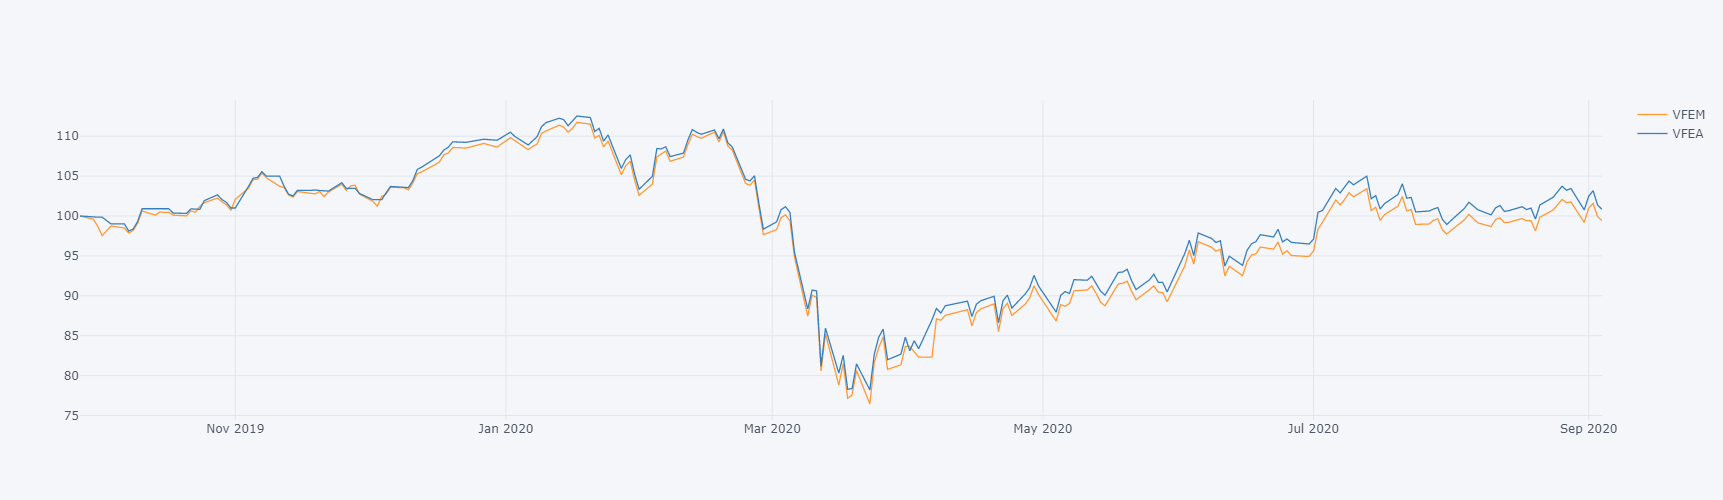

In [11]:
ETFs = ETFs.loc['2019-09-27':]

fundos = ETFs.copy()

fundos.columns = Nomes
fundos = fundos.dropna()

fundos.index = pd.to_datetime(fundos.index)

#### Normalization to 100 ####
fundos = round((fundos / fundos.iloc[0] * 100), 2)

fundos.iplot(dimensions=pa.dimensions)

A diferença parece-me ser apenas a distribuição do VFEM, que é de cerca de 2% ao ano.

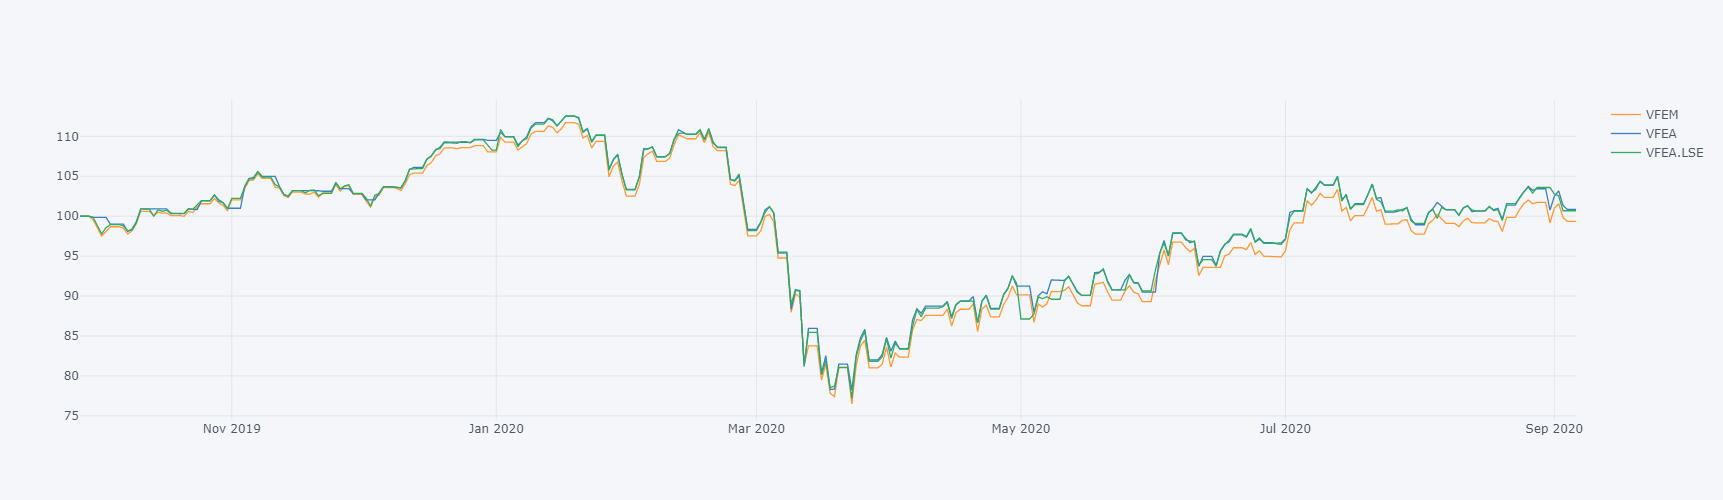

In [18]:
ISINs = ['VFEM' , 'VFEA', 'VFEA.LSE.EUR']
Nomes=['VFEM', 'VFEA', 'VFEA.LSE']

#VFEA.LSE.EUR

Quotes = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col='Date', parse_dates=True)[ISINs].dropna()
Quotes.columns=Nomes
Quotes = Quotes.loc['2019-09-27':]

Quotes = pa.compute_growth_index(Quotes)

Quotes.iplot(dimensions=pa.dimensions)

In [19]:
pa.compute_performance_table(Quotes)

**Performance from 2019-09-27 to 2020-09-06 (≈ 0.9 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
VFEM,-0.69%,-0.65%,23.24%,-0.03,-31.53%,-0.02
VFEA,0.89%,0.84%,24.14%,0.04,-30.51%,0.03
VFEA.LSE,0.72%,0.68%,23.71%,0.03,-31.41%,0.02


0.72 - (-0.69) = 1.41

VFEA na Alemanhã (em euros) e o VFEA na LSE em USD covertido para euros são muito semelhantes. Falham alguns dias mas isso pode ser devido a muitas coisas, como feriados, valores diferentes de taxas de câmbbio euro/dólar etc etc. Acho que se alinham bastantes mais dias do que os que divergem, e quando fazem é por pouco!

In [29]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF